<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/notebook/ch14_Generative_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생성 모델 (generative model)

- 훈련 데이터의 규칙성 또는 패턴을 자동으로 발견하고 학습하여, 훈련 데이터의 확률 분포와 유사하지만, 새로운 샘플을 생성하는 신경망

- 입력 데이터의 확률 분포 p(x)를 알려고 함

## MNIST 숫자 이미지를 처리하는 신경망 (예제)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,))			      # (1)
dense = layers.Dense(64, activation="relu")		# (2)
x = dense(inputs)					                    # (3)
x = layers.Dense(64, activation="relu")(x)		# (4)
outputs = layers.Dense(10)(x)				          # (5)

model = keras.Model(inputs=inputs, outputs=outputs)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/2
750/750 [==============================] - 13s 7ms/step - loss: 0.3534 - accuracy: 0.8988 - val_loss: 0.1770 - val_accuracy: 0.9479
Epoch 2/2
750/750 [==============================] - 3s 5ms/step - loss: 0.1581 - accuracy: 0.9536 - val_loss: 0.1402 - val_accuracy: 0.9571
313/313 - 1s - loss: 0.1307 - accuracy: 0.9600 - 639ms/epoch - 2ms/step


## Auto Encoder

- 입력과 동일한 출력을 만드는 것을 목적으로 하는 신경망

- 인코더 : 입력을 잠재 표현으로 인코딩함
- 디코더 : 잠재 표현을 풀어서 입력을 복원함
- 손실 함수 : 입력 이미지와 출력 이미지의 MSE를 사용

### 필기체 숫자를 압축하는 오토인코더 (예제)

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())



In [3]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




(60000, 28, 28)
(60000, 784)
Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0708 - val_loss: 0.0422
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0356 - val_loss: 0.0298
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0266 - val_loss: 0.0233
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0216 - val_loss: 0.0193
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0182 - val_loss: 0.0165
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0146
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0143 - val_loss: 0.0132
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - lo

313/313 [==============================] - 1s 1ms/step
(10000, 784)


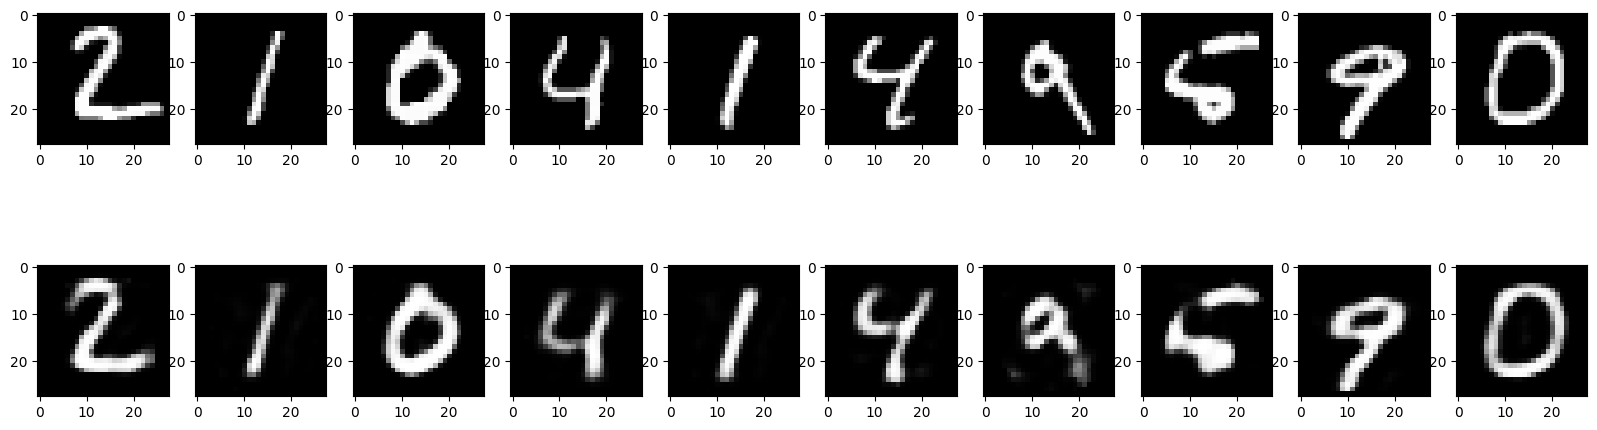

In [4]:
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

### 노이즈 제거 오토 인코더

- 노이즈가 있는 이미지에서 노이즈를 제거하는 용도로도 사용가능

In [5]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)  # (784,784)



In [6]:
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flattening: (28,28)=> (784,)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



In [7]:
noise_factor = 0.55

original_train = x_train
original_test = x_test
noise_train = np.random.normal(0, 1, original_train.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_train = original_train + noise_factor * noise_train
noisy_test = original_test + noise_factor * noise_test
print(noisy_train.shape)



(60000, 784)


In [8]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(noisy_train, original_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noisy_test, original_test))

denoised_images = autoencoder.predict(noisy_test)
print(denoised_images.shape)



Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0741 - val_loss: 0.0468
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0406 - val_loss: 0.0356
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0332 - val_loss: 0.0307
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0294 - val_loss: 0.0278
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0270 - val_loss: 0.0258
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0252 - val_loss: 0.0242
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0230 - val_loss: 0.0224
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0224 - val_loss: 0.0219
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0220 - val_loss: 0.0216

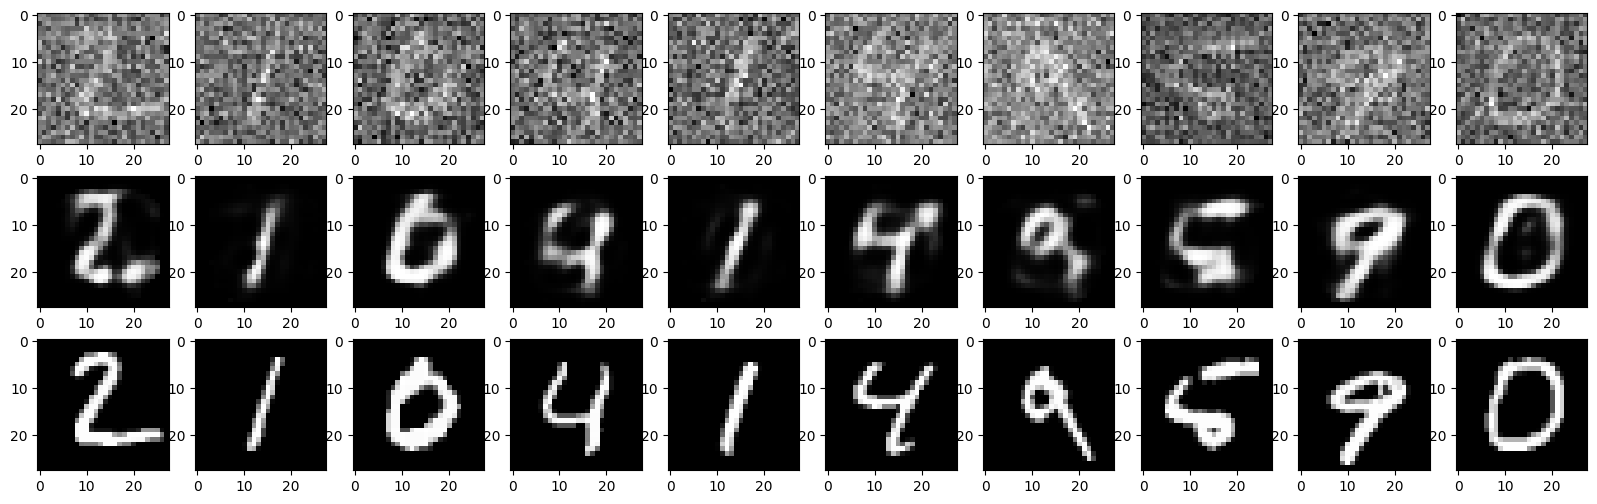

In [9]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(original_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
    
plt.show()

## GAN (Generative adversarial network, 생성적 적대 신경망)

- 생성자 신경망과 판별자 신경망이 서로 적대적으로 경쟁하면서 훈련을 통하여 자신의 작업을 점점 정교하게 수행함

- 생성자 : 가짜 데이터를 생성하는 것을 학습한다. 생성된 데이터는 판별자를 위한 학습 예제가 된다

- 판별자 : 생성자의 가짜 데이터를 진짜 데이터와 구분하는 방법을 학습함. 판별자는 생성자가 유사하지 않은 데이터를 생성하면 불이익을 줌

### GAN으로 숫자 이미지 생성 (예제)

In [10]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# 학습 데이터와 테스트 데이터 분리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 이미지를 [0, 1] 범위로 스케일링
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255



In [11]:
BATCH_SIZE=128
EPOCHS=5000 # 2000, 2500, 5000
Z_DIMENSIONS=32
data = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))



In [12]:
# discriminator
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
	activation='relu', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         819456    
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 256)         0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

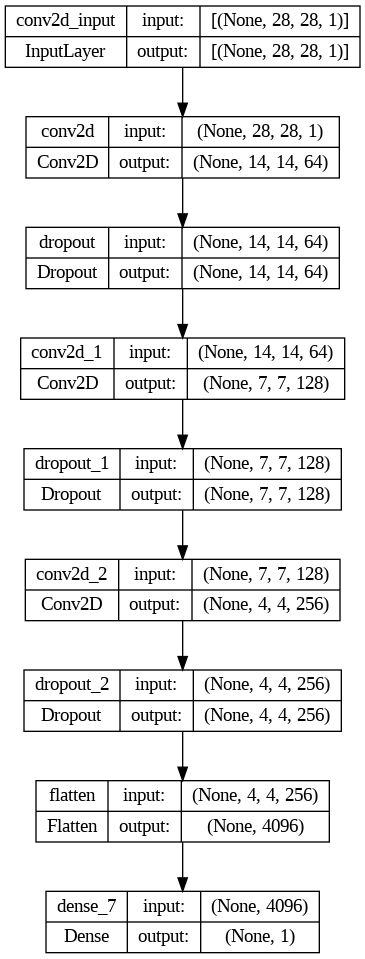

In [13]:
# 판별자 신경망 구축하기
discriminator = make_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                      metrics=['accuracy'])

discriminator.summary()
from tensorflow.keras.utils import plot_model
plot_model(discriminator, show_shapes=True)

In [14]:
# generator
def make_generator():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(7*7*64, input_shape=(Z_DIMENSIONS,)))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((7, 7, 64)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.UpSampling2D())  # UpSampling2D(size=(2, 2),...
    model.add(tf.keras.layers.Conv2DTranspose(32,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(16,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(1, kernel_size=5, padding='same',
                   activation='sigmoid'))
    return model



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3136)              103488    
                                                                 
 batch_normalization (BatchN  (None, 3136)             12544     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 64)       0         
 )                                                    

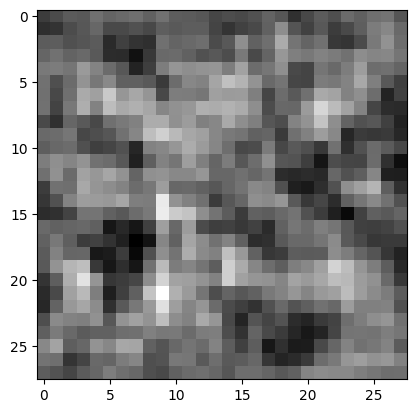

In [15]:
#생성자 신경망 구축
generator = make_generator()
generator.summary()
# from tensorflow.keras.utils import plot_model
plot_model(generator, show_shapes=True)

noise = tf.random.normal([1, Z_DIMENSIONS])  # one batch of noise
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         180673    
                                                                 
 sequential (Sequential)     (None, 1)                 1030145   
                                                                 
Total params: 1,210,818
Trainable params: 174,305
Non-trainable params: 1,036,513
_________________________________________________________________


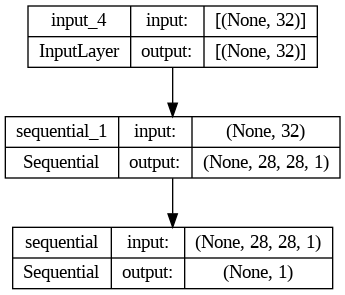

In [16]:
# GAN model
z = tf.keras.layers.Input(shape=(Z_DIMENSIONS,))
fake_image = generator(z)
discriminator.trainable = False
prediction = discriminator(fake_image)
gan_model = tf.keras.models.Model(z, prediction)

gan_model.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                          metrics=['accuracy'])

gan_model.summary()
plot_model(gan_model, show_shapes=True)



1/1 [==============================] - 0s 195ms/step


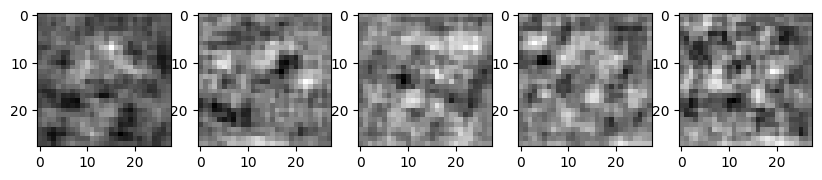

1/1 [==============================] - 0s 29ms/step


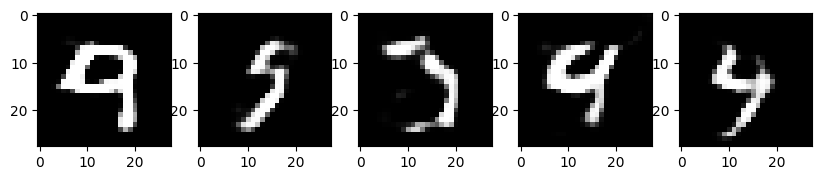

1/1 [==============================] - 0s 19ms/step


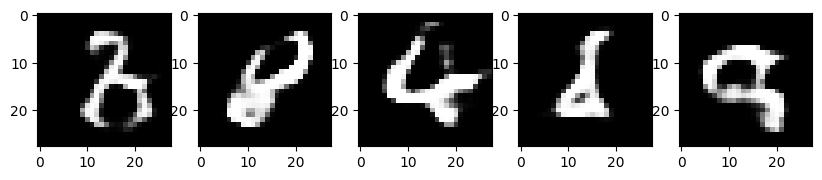

1/1 [==============================] - 0s 18ms/step


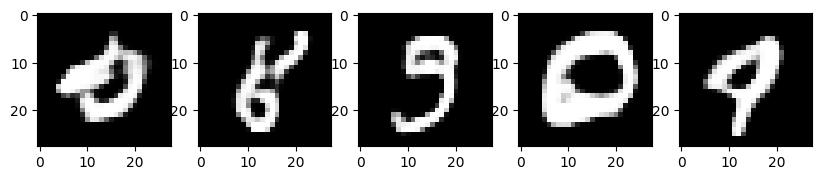

1/1 [==============================] - 0s 19ms/step


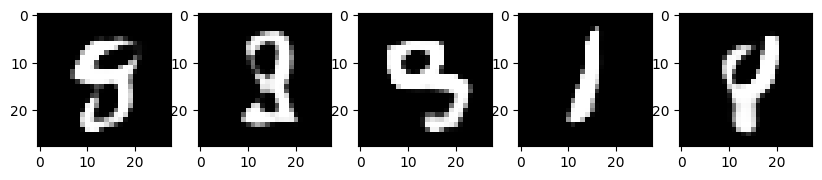

1/1 [==============================] - 0s 22ms/step


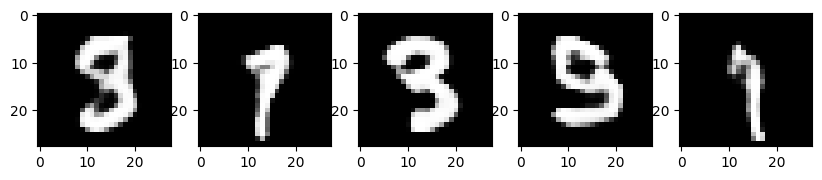

In [17]:
def train_gan():
    for i in range(EPOCHS+1):
        real_images = np.reshape(
            data[np.random.choice(data.shape[0],
                                  BATCH_SIZE,
                                  replace=False)], (BATCH_SIZE,28,28,1))
        fake_images = generator.predict(
           np.random.uniform(-1.0, 1.0,
                             size=[BATCH_SIZE, Z_DIMENSIONS]))

        x = np.concatenate((real_images,fake_images))

        y = np.ones([2*BATCH_SIZE,1])
        y[BATCH_SIZE:,:] = 0

        discriminator.train_on_batch(x, y)
 
        noise = np.random.uniform(-1.0, 1.0, size=[BATCH_SIZE, Z_DIMENSIONS])
        y = np.ones([BATCH_SIZE,1])

        gan_model.train_on_batch(noise, y)
 
        if i%1000 == 0:
           noise = np.random.uniform(-1.0, 1.0,
                                     size=[5, Z_DIMENSIONS])
           generated_image = generator.predict(noise)
           plt.figure(figsize=(10,10))
           for i in range(generated_image.shape[0]):
               plt.subplot(1, 5, i+1)
               plt.imshow(generated_image[i, :, :, 0],
                          cmap='gray')
           plt.show()

train_gan()



1/1 [==============================] - 0s 19ms/step


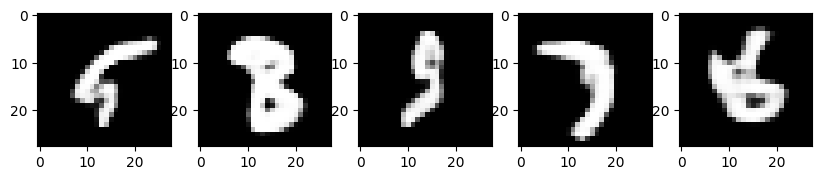

In [18]:
# fake images from trained generator
noise = np.random.uniform(-1.0, 1.0,
                          size=[5, Z_DIMENSIONS])
generated_image = generator.predict(noise)
plt.figure(figsize=(10,10))
for i in range(generated_image.shape[0]):
    plt.subplot(1, 5, i+1)
    plt.imshow(generated_image[i, :, :, 0],
               cmap='gray')
plt.show()